# Neural Network 

Ref: https://www.youtube.com/watch?v=Spu4gH_YfNU&ab_channel=AleksandarHaber

In [71]:
import tensorflow as tf
from tensorflow import keras
import cmath
import time
from keras import models
from keras import layers
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.1


In [72]:
# number of samples for training
sample_number = 10000

In [73]:
# create a function to generate random numbers in a range but without 0
def nonzero_random(min, max):
    x = 0
    epsilon = 1e-10
    while abs(x) < epsilon: x = np.random.uniform(min, max)
    return x

# training input data: parameters, the value of the input value is [-10, 10] and exclude 0
Adata, Bdata, Cdata = [], [], []
for i in range(sample_number):
    Adata.append([nonzero_random(-10, 10)])
    Bdata.append([nonzero_random(-10, 10)])
    Cdata.append([nonzero_random(-10, 10)])
    pass
# Transfer the list to numpy array with dimension 1
Adata = np.array(Adata)
Bdata = np.array(Bdata)
Cdata = np.array(Cdata)
# Adata = np.random.rand(sample_number, 1)
print(Adata)
# Bdata = np.random.rand(sample_number, 1)
# print(Bdata)
# Cdata = np.random.rand(sample_number, 1)
# print(Cdata)

# split the data for traning, validate and test
trainAdata, testingAdata = train_test_split(Adata, test_size=0.15, random_state=25)
trainBdata, testingBdata = train_test_split(Bdata, test_size=0.15, random_state=25)
trainCdata, testingCdata = train_test_split(Cdata, test_size=0.15, random_state=25)

trainingAdata, validatingAdata = train_test_split(trainAdata, test_size=0.05, random_state=25)
trainingBdata, validatingBdata = train_test_split(trainBdata, test_size=0.05, random_state=25)
trainingCdata, validatingCdata = train_test_split(trainCdata, test_size=0.05, random_state=25)

# concatenate the input data a, b, c as a vector input
dataXtrain = np.concatenate((trainingAdata, trainingBdata, trainingCdata), axis=1)
# print(dataXtrain)
dataXval = np.concatenate((validatingAdata, validatingBdata, validatingCdata), axis=1)
dataXtest = np.concatenate((testingAdata, testingBdata, testingCdata), axis=1)
print(dataXtrain)
print(len(dataXtrain))



[[ 0.75289667]
 [ 1.37605051]
 [-8.98565606]
 ...
 [ 7.23661092]
 [ 1.45804125]
 [ 5.13186062]]
[[ 3.63607135  3.86795546 -8.26971312]
 [ 5.8305246   3.29221981 -1.21986078]
 [-5.80889862 -1.04106608 -1.57489353]
 ...
 [-2.32822859  3.00575665 -0.57081532]
 [-4.91482942 -9.23397225  2.30150218]
 [ 6.53689983  6.86786168 -2.27103893]]
8075


In [74]:
# training output data - a complex number: the roots of the given function
x1real = np.zeros(shape=(sample_number, 1))
x1imag = np.zeros(shape=(sample_number, 1))
x2real = np.zeros(shape=(sample_number, 1))
x2imag = np.zeros(shape=(sample_number, 1))

for i in range(sample_number):
    # the real solution of each input
    x1 = (-Bdata[i,0] + cmath.sqrt(Bdata[i,0]**2 - 4 * Adata[i,0]*Cdata[i,0])) / (2*Adata[i,0])
    x2 = (-Bdata[i,0] - cmath.sqrt(Bdata[i,0]**2 - 4 * Adata[i,0]*Cdata[i,0])) / (2*Adata[i,0])
    # transfer the real solution to our output traning data
    x1real[i,0] = np.real(x1)
    x1imag[i,0] = np.imag(x1)
    x2real[i,0] = np.real(x2)
    x2imag[i,0] = np.imag(x2)
    pass

# split the data for traning, validate and test
x1real_85, x1real_test = train_test_split(x1real, test_size=0.15, random_state=25)
x1imag_85, x1imag_test = train_test_split(x1imag, test_size=0.15, random_state=25)
x2real_85, x2real_test = train_test_split(x2real, test_size=0.15, random_state=25)
x2imag_85, x2imag_test = train_test_split(x2imag, test_size=0.15, random_state=25)

x1real_train, x1real_val = train_test_split(x1real_85, test_size=0.05, random_state=25)
x1imag_train, x1imag_val = train_test_split(x1imag_85, test_size=0.05, random_state=25)
x2real_train, x2real_val = train_test_split(x2real_85, test_size=0.05, random_state=25)
x2imag_train, x2imag_val = train_test_split(x2imag_85, test_size=0.05, random_state=25)

# create a function to concatenate the output values in an order
def ordered_concate(x1, x2, x3, x4):
    result = []
    length = len(x1)
    for i in range(length):
        pairs = [x1[i,0], x2[i,0],x3[i,0],x4[i,0]]
        # print(pairs)
        pairs.sort()
        # print(pairs)
        result.append(pairs)
        pass
    return result

# concatenate the output data as a vector output
dataYtrain = np.array(ordered_concate(x1real_train, x1imag_train, x2real_train, x2imag_train))
dataYval = np.array(ordered_concate(x1real_val, x1imag_val, x2real_val, x2imag_val))
# print(x1imag_val)
# print(x2imag_val)
# print(dataYval)
dataYtest = np.array(ordered_concate(x1real_test, x1imag_test, x2real_test, x2imag_test))
print(dataYtrain)
print(len(dataYtrain))

[[-2.1310293   0.          0.          1.06725605]
 [-0.81984627  0.          0.          0.25519385]
 [-0.51292059 -0.08960959 -0.08960959  0.51292059]
 ...
 [-0.         -0.          0.23137431  1.05963151]
 [-2.10161578 -0.         -0.          0.22281767]
 [-1.31485532  0.          0.          0.26422553]]
8075


In [75]:
# # validation data
# aval = np.random.rand(sample_number, 1)
# bval = np.random.rand(sample_number, 1)
# cval = np.random.rand(sample_number, 1)
 
# dataXval = np.concatenate((aval, bval, cval), axis = 1)

# x1real_val = np.zeros(shape = (sample_number, 1))
# x1imag_val = np.zeros(shape = (sample_number, 1))
# x2real_val = np.zeros(shape = (sample_number, 1))
# x2imag_val = np.zeros(shape = (sample_number, 1))
 
 
# for i in range(sample_number):
#     x1 = (-bval[i,0] + cmath.sqrt(bval[i,0]**2 - 4 * aval[i,0] * cval[i,0])) / (2*aval[i,0])
#     x2 = (-bval[i,0] - cmath.sqrt(bval[i,0]**2 - 4 * aval[i,0] * cval[i,0])) / (2*aval[i,0])
#     x1real_val[i,0] = np.real(x1)
#     x1imag_val[i,0] = np.imag(x1)
#     x2real_val[i,0] = np.real(x2)
#     x2imag_val[i,0] = np.imag(x2)
#     pass

# dataYval = np.concatenate((x1real_val,x1imag_val,x2real_val,x2imag_val), axis = 1)


In [76]:
# # test data
# atest = np.random.rand(sample_number, 1)
# btest = np.random.rand(sample_number, 1)
# ctest = np.random.rand(sample_number, 1)
 
# dataXtest = np.concatenate((atest, btest, ctest), axis = 1)
 
# x1real_test = np.zeros(shape = (sample_number, 1))
# x1imag_test = np.zeros(shape = (sample_number,1))
# x2real_test = np.zeros(shape = (sample_number,1))
# x2imag_test = np.zeros(shape = (sample_number,1))
 
 
# for i in range(sample_number):
#     x1 = (-btest[i, 0] + cmath.sqrt(btest[i, 0]**2 - 4 * atest[i, 0] * ctest[i, 0])) / (2*atest[i, 0])
#     x2 = (-btest[i, 0] - cmath.sqrt(btest[i, 0]**2 - 4 * atest[i, 0] * ctest[i, 0])) / (2*atest[i, 0])
    
#     x1real_test[i, 0] = np.real(x1)
#     x1imag_test[i, 0] = np.imag(x1)
#     x2real_test[i, 0] = np.real(x2)
#     x2imag_test[i, 0] = np.imag(x2)
 
# dataYtest = np.concatenate((x1real_test, x1imag_test, x2real_test, x2imag_test), axis = 1)

In [77]:
###############################################################################
#                         neural network
###############################################################################
with tf.device(device_name='/GPU:0'):
    network = models.Sequential()
    
    # define layers of the neural network
    network.add(layers.Dense(20, activation='tanh', kernel_initializer='random_normal', use_bias=False, input_dim=3))
    network.add(layers.Dense(20, activation='tanh', kernel_initializer='random_normal', use_bias=False))
    network.add(layers.Dense(20, activation='tanh', kernel_initializer='random_normal', use_bias=False))
    network.add(layers.Dense(20, activation='relu', kernel_initializer='random_uniform', use_bias=False))
    network.add(layers.Dense(4, activation = 'linear', kernel_initializer='random_normal', use_bias=False))
    
    # define the optimizer, with different loss function
    network.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse'])
    #network.compile(optimizer=RMSprop(), loss='mean_absolute_percentage_error', metrics=['mse'])  # 'mean_absolute_percentage_error' is another option
    #network.compile(optimizer=Adam(), loss='mean_squared_error')
     
     
    # only save the model with the best validation loss value
    filepath="C:/Users/hengr/OneDrive/Desktop/Projects/Machine-Learning-process/stanford-cs-229-machine-learning/best_model.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min')
    callbacks_list = [checkpoint]
    
    # neural network traning
    start_time = time.time()
    history = network.fit(dataXtrain, dataYtrain, epochs=3000, batch_size=2000, callbacks=callbacks_list, validation_data = (dataXval, dataYval), verbose = 2)
    end_time = time.time()
    print('Training time %f'%(end_time-start_time))

Epoch 1/3000
5/5 - 0s - loss: 5676.8760 - mse: 5676.8760 - val_loss: 364.5777 - val_mse: 364.5777 - 257ms/epoch - 51ms/step
Epoch 2/3000
5/5 - 0s - loss: 5676.8682 - mse: 5676.8682 - val_loss: 364.5662 - val_mse: 364.5662 - 41ms/epoch - 8ms/step
Epoch 3/3000
5/5 - 0s - loss: 5676.8540 - mse: 5676.8540 - val_loss: 364.5360 - val_mse: 364.5360 - 35ms/epoch - 7ms/step
Epoch 4/3000
5/5 - 0s - loss: 5676.8198 - mse: 5676.8198 - val_loss: 364.4680 - val_mse: 364.4680 - 39ms/epoch - 8ms/step
Epoch 5/3000
5/5 - 0s - loss: 5676.7515 - mse: 5676.7515 - val_loss: 364.3529 - val_mse: 364.3529 - 36ms/epoch - 7ms/step
Epoch 6/3000
5/5 - 0s - loss: 5676.6401 - mse: 5676.6401 - val_loss: 364.1482 - val_mse: 364.1482 - 42ms/epoch - 8ms/step
Epoch 7/3000
5/5 - 0s - loss: 5676.4556 - mse: 5676.4556 - val_loss: 363.8823 - val_mse: 363.8823 - 36ms/epoch - 7ms/step
Epoch 8/3000
5/5 - 0s - loss: 5676.2139 - mse: 5676.2139 - val_loss: 363.5464 - val_mse: 363.5464 - 40ms/epoch - 8ms/step
Epoch 9/3000
5/5 - 0s 

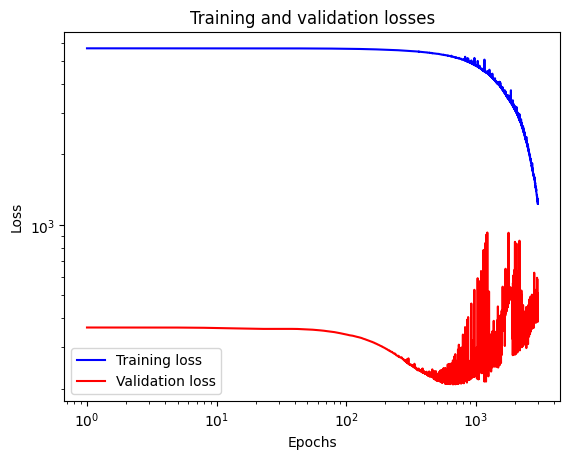

In [78]:
###############################################################################
#                    Plot the history    
###############################################################################
     
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('loss_curves4.png')
plt.show()

47/47 [==============================] - 0s 565us/step


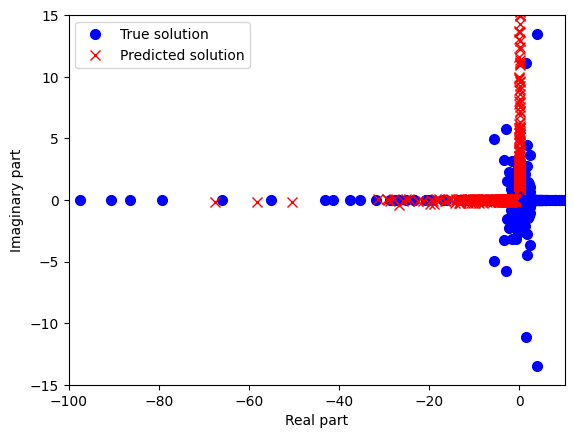

In [79]:
###############################################################################
#                   test the model prediction performance
###############################################################################
# load the best model we get from training
network.load_weights(filepath)


dataYtrain_prediction = network.predict(dataXtrain)
dataYval_prediction = network.predict(dataXval)

# generate the prediction output to make comparison
dataYtest_prediction = network.predict(dataXtest)

# x1real_test, x1imag_test, x2real_test, x2imag_test

# extract the data
# x1real_test[i,0] = np.real(x1real_test)
# x1imag_test[i,0] = np.imag(x1imag_test)
# x2real_test[i,0] = np.real(x2real_test)
# x2imag_test[i,0] = np.imag(x2imag_test)

leng = int(sample_number * 0.15)

x1real_test_prediction = np.zeros(shape=(leng,1))
x1imag_test_prediction = np.zeros(shape=(leng,1))
x2real_test_prediction = np.zeros(shape=(leng,1))
x2imag_test_prediction = np.zeros(shape=(leng,1))

# leng = sample_number * 0.15
for i in range(leng):
    x1real_test_prediction[i,0] = dataYtest_prediction[i,0]
    x1imag_test_prediction[i,0] = dataYtest_prediction[i,1]
    x2real_test_prediction[i,0] = dataYtest_prediction[i,2]
    x2imag_test_prediction[i,0] = dataYtest_prediction[i,3]
     
plt.plot(x1real_test, x1imag_test, 'bo', markersize=7, label='True solution')    
plt.plot(x2real_test, x2imag_test, 'bo', markersize=7) 
plt.plot(x1real_test_prediction, x1imag_test_prediction, 'rx', markersize=7, label='Predicted solution')    
plt.plot(x2real_test_prediction, x2imag_test_prediction, 'rx', markersize=7)    
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.xlim(-100, 10)
plt.ylim(-15, 15)
plt.legend()
plt.savefig('identified4.png')
plt.show()